
# Predict The News Category : Anshul Patel


#### Import General Libraries

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 128kB/s 
     |████████████████████████████████| 983kB 51.9MB/s 
     |████████████████████████████████| 266kB 54.3MB/s 
     |████████████████████████████████| 1.3MB 54.4MB/s 
     |████████████████████████████████| 471kB 30.2MB/s 
     |████████████████████████████████| 890kB 53.7MB/s 
     |████████████████████████████████| 1.1MB 53.7MB/s 
     |████████████████████████████████| 2.9MB 56.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.23.2-cp36-none-any.whl size=25272006 sha256=443cfe83b30f0d8569d41f4529161acb3200a435cbd9b6e13f5e2dfa977a136b
  Stored in directory: /root/.cache/pip/wheels/fe/4a/b1/aff404c4e0893ca1c0b64781d0298b7ff6de94d5117a0e7d5c
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=5d8a7070be4e76e1ac598d23589547dca45922798778bb09bc8ab53087c71258
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [ ]:
import ktrain
from ktrain import text

#### Import Training Data

In [ ]:
DATA_PATH = '/content/drive/My Drive/MH/PTNC/Data_Train.csv'

#### Preprocessing Text Data

In [ ]:
MAXLEN = 500
NUM_WORDS = 50000
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'Text',
                      label_columns = ["Label"],
                      val_filepath=None,
                      max_features=NUM_WORDS,
                      maxlen=MAXLEN,
                      ngram_range=1)

detected encoding: WINDOWS-1252 (if wrong, set manually)
language: en
Word Counts: 35997
Nrows: 6865
6865 train sequences
train sequence lengths:
	mean : 110
	95percentile : 257
	99percentile : 465
x_train shape: (6865,500)
y_train shape: (6865, 4)
Is Multi-Label? False
763 test sequences
test sequence lengths:
	mean : 109
	95percentile : 232
	99percentile : 483
x_test shape: (763,500)
y_test shape: (763, 4)


#### Initialize Model

In [ ]:
model = text.text_classifier('fasttext', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 500
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
215/215 [==============================] - 3s 15ms/step - loss: 2.0459 - accuracy: 0.2242
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 2.0477 - accuracy: 0.2189
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 1.3235 - accuracy: 0.4503
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.8557 - accuracy: 0.6839
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 1.5328 - accuracy: 0.3098


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


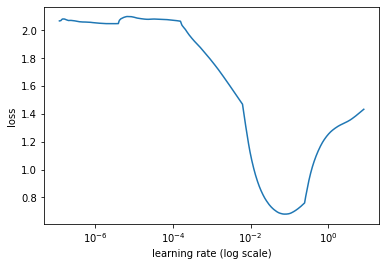

In [ ]:
learner.lr_find(max_epochs=5)
learner.lr_plot()

#### Train the Model

In [ ]:
learner.autofit(0.001)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
215/215 [==============================] - 4s 16ms/step - loss: 1.5191 - accuracy: 0.3710 - val_loss: 1.2748 - val_accuracy: 0.4535
Epoch 2/1024
215/215 [==============================] - 3s 16ms/step - loss: 0.8986 - accuracy: 0.6358 - val_loss: 0.7723 - val_accuracy: 0.8571
Epoch 3/1024
215/215 [==============================] - 3s 16ms/step - loss: 0.5846 - accuracy: 0.7828 - val_loss: 0.2773 - val_accuracy: 0.9397
Epoch 4/1024
215/215 [==============================] - 3s 15ms/step - loss: 0.4396 - accuracy: 0.8468 - val_loss: 0.1811 - val_accuracy: 0.9515
Epoch 5/1024
215/215 [==============================] - 3s 16ms/step - loss: 0.3286 - accuracy: 0.8874 - val_loss: 0.1491 - val_accuracy: 0.9594
Epoch 6/1024
215/215 [==============================] - 3s 16ms/step - loss: 0.2829 - accur

#### Predict on Test Data

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
import pandas as pd
docs = pd.read_csv('/content/drive/My Drive/MH/PTNC/Data_Test.csv',encoding='WINDOWS-1252')
docs.head()

,TEXT
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [ ]:
data = docs['TEXT'].to_list()

In [ ]:
test_result = predictor.predict(data)

['Label_1',
 'Label_2',
 'Label_1',
 'Label_1',
 'Label_1',
 'Label_1',
 'Label_1',
 'Label_2',
 'Label_1',
 'Label_2',
 'Label_0',
 'Label_3',
 'Label_2',
 'Label_1',
 'Label_2',
 'Label_1',
 'Label_1',
 'Label_2',
 'Label_3',
 'Label_2',
 'Label_2',
 'Label_2',
 'Label_2',
 'Label_0',
 'Label_0',
 'Label_2',
 'Label_2',
 'Label_3',
 'Label_3',
 'Label_0',
 'Label_1',
 'Label_3',
 'Label_2',
 'Label_0',
 'Label_2',
 'Label_2',
 'Label_2',
 'Label_2',
 'Label_0',
 'Label_1',
 'Label_0',
 'Label_1',
 'Label_3',
 'Label_0',
 'Label_2',
 'Label_2',
 'Label_1',
 'Label_1',
 'Label_0',
 'Label_1',
 'Label_3',
 'Label_2',
 'Label_1',
 'Label_2',
 'Label_2',
 'Label_0',
 'Label_1',
 'Label_1',
 'Label_0',
 'Label_1',
 'Label_2',
 'Label_2',
 'Label_3',
 'Label_2',
 'Label_1',
 'Label_1',
 'Label_2',
 'Label_0',
 'Label_0',
 'Label_1',
 'Label_1',
 'Label_1',
 'Label_2',
 'Label_0',
 'Label_0',
 'Label_1',
 'Label_1',
 'Label_1',
 'Label_2',
 'Label_2',
 'Label_3',
 'Label_0',
 'Label_3',
 'La

In [ ]:
for i in range(len(test_result)):
  test_result[i] = int(test_result[i][-1])

In [ ]:
df_T = pd.DataFrame(test_result)
df_T.to_excel(excel_writer = "/content/drive/My Drive/MH/PTNC/FastTextResult.xlsx")

# RESULT ON PUBLIC DATA : 0.97197